In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.set_option('display.max_columns',None)

# Load Dataset

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
75055,City Hotel,1,271,2017,September,29,15,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,NaN,0,Family,62.00,0,0,Canceled
91867,City Hotel,0,192,2018,August,26,24,0,2,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,34.0,NaN,0,Family,95.00,0,0,Check-Out
63518,City Hotel,1,12,2019,April,7,13,1,0,2,0.0,0,Dinner,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,14.0,NaN,0,Personal,143.00,0,2,Canceled
35714,Resort Hotel,0,94,2019,June,17,23,2,5,2,0.0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,40.0,NaN,0,Contract,70.95,0,0,Check-Out
22063,Resort Hotel,0,47,2018,May,10,3,4,10,2,0.0,0,Breakfast,Kota Malang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,8.0,NaN,0,Personal,26.10,0,0,Check-Out


# Data Checking

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
result = []
for col in df.columns:
    result.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])

output = pd.DataFrame(data=result, columns = 'column data_type no._null percent_null no._unique unique_sample'.split())
output

,column,data_type,no._null,percent_null,no._unique,unique_sample
0,hotel,object,0,0.000000,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.000000,2,"[0, 1]"
2,lead_time,int64,0,0.000000,479,"[342, 737, 7, 13, 14]"
3,arrival_date_year,int64,0,0.000000,3,"[2017, 2018, 2019]"
4,arrival_date_month,object,0,0.000000,12,"[September, October, November, December, January]"
5,arrival_date_week_number,int64,0,0.000000,53,"[27, 28, 29, 30, 31]"
6,arrival_date_day_of_month,int64,0,0.000000,31,"[1, 2, 3, 4, 5]"
7,stays_in_weekend_nights,int64,0,0.000000,17,"[0, 1, 2, 4, 3]"
8,stays_in_weekdays_nights,int64,0,0.000000,35,"[0, 1, 2, 3, 4]"
9,adults,int64,0,0.000000,14,"[2, 1, 3, 4, 40]"


# Data Cleansing

## Null Values

### Imputing null values in children column with the mode

In [ ]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [ ]:
df.loc[df['children'].isna(), 'children'] = 0

In [ ]:
df['children'].isna().sum()

0

### Dropping rows with null cities

In [ ]:
df = df.dropna(subset=['city'])

In [ ]:
df['city'].isna().sum()

0

### Dropping the 'agent' and 'company' columns because of the high null value percentage

In [ ]:
df = df.drop(columns = ['agent', 'company'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118902 non-null  object 
 1   is_canceled                     118902 non-null  int64  
 2   lead_time                       118902 non-null  int64  
 3   arrival_date_year               118902 non-null  int64  
 4   arrival_date_month              118902 non-null  object 
 5   arrival_date_week_number        118902 non-null  int64  
 6   arrival_date_day_of_month       118902 non-null  int64  
 7   stays_in_weekend_nights         118902 non-null  int64  
 8   stays_in_weekdays_nights        118902 non-null  int64  
 9   adults                          118902 non-null  int64  
 10  children                        118902 non-null  float64
 11  babies                          118902 non-null  int64  
 12  meal            

## Handling inappropriate values

### Checking for "undefined" values

In [ ]:
res=[]
for col in df.columns:
    if len(df[df[col] == 'Undefined'])>0:
        res.append(f'{col}: Undefined')


res

['meal: Undefined',
 'market_segment: Undefined',
 'distribution_channel: Undefined']

### Substituting inappropriate values in meal column

In [ ]:
df['meal'].value_counts()

Breakfast     91867
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

In [ ]:
df.loc[df['meal'] == 'Undefined', 'meal'] = 'Breakfast'

In [ ]:
df['meal'].value_counts()

Breakfast     93032
Dinner        14434
No Meal       10638
Full Board      798
Name: meal, dtype: int64

### Substituting inappropriate values in distribution_channel column

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

In [ ]:
df.loc[df['distribution_channel'] == 'Undefined', 'distribution_channel'] = 'TA/TO'

In [ ]:
df['distribution_channel'].value_counts()

TA/TO        97735
Direct       14483
Corporate     6491
GDS            193
Name: distribution_channel, dtype: int64

### Dropping inappropriate values in market_segment column

In [ ]:
df['market_segment'].value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
df = df[(df['market_segment'] != 'Undefined')]

In [ ]:
df['market_segment'].value_counts()

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

## Discarding unnecessary data

### Aggregating the adults, children, and babies columns into a single total_guest column

In [ ]:
df = df.copy()
df['total_guest'] = df['adults'] + df['children'] + df['babies']
df = df.drop(columns=['adults', 'children', 'babies'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118900 non-null  object 
 1   is_canceled                     118900 non-null  int64  
 2   lead_time                       118900 non-null  int64  
 3   arrival_date_year               118900 non-null  int64  
 4   arrival_date_month              118900 non-null  object 
 5   arrival_date_week_number        118900 non-null  int64  
 6   arrival_date_day_of_month       118900 non-null  int64  
 7   stays_in_weekend_nights         118900 non-null  int64  
 8   stays_in_weekdays_nights        118900 non-null  int64  
 9   meal                            118900 non-null  object 
 10  city                            118900 non-null  object 
 11  market_segment                  118900 non-null  object 
 12  distribution_cha

# **Monthly Hotel Booking Analysis Based on Hotel Type**

## Checking the presence of the 12 months throughout the years (2017-2019)

In [ ]:
dfg = df.groupby(['arrival_date_month', 'hotel'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
dfg.columns = ['month', 'hotel_type', 'unique_years', 'no._bookings']
dfg

,month,hotel_type,unique_years,no._bookings
0,April,City Hotel,2,4965
1,April,Resort Hotel,2,3047
2,August,City Hotel,2,7894
3,August,Resort Hotel,2,3033
4,December,City Hotel,2,7591
5,December,Resort Hotel,2,3504
6,February,City Hotel,2,4129
7,February,Resort Hotel,2,2599
8,January,City Hotel,2,4354
9,January,Resort Hotel,2,2398


## Normalizing No. bookings by taking the average throughout the years (2017-2019)

In [ ]:
dfg['avg_bookings'] = round(dfg['no._bookings']/dfg['unique_years'], 2)
dfg

,month,hotel_type,unique_years,no._bookings,avg_bookings
0,April,City Hotel,2,4965,2482.50
1,April,Resort Hotel,2,3047,1523.50
2,August,City Hotel,2,7894,3947.00
3,August,Resort Hotel,2,3033,1516.50
4,December,City Hotel,2,7591,3795.50
5,December,Resort Hotel,2,3504,1752.00
6,February,City Hotel,2,4129,2064.50
7,February,Resort Hotel,2,2599,1299.50
8,January,City Hotel,2,4354,2177.00
9,January,Resort Hotel,2,2398,1199.00


## Sorting the data based on month name

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

dfg['month'] = dfg['month'].str[:3]
dfg['month'] = pd.Categorical(dfg['month'], categories = months, ordered=True)
dfg = dfg.sort_values(['hotel_type', 'month']).reset_index(drop=True)

dfg

,month,hotel_type,unique_years,no._bookings,avg_bookings
0,Jan,City Hotel,2,4354,2177.00
1,Feb,City Hotel,2,4129,2064.50
2,Mar,City Hotel,2,3736,1868.00
3,Apr,City Hotel,2,4965,2482.50
4,May,City Hotel,2,6458,3229.00
5,Jun,City Hotel,2,7476,3738.00
6,Jul,City Hotel,2,8232,4116.00
7,Aug,City Hotel,2,7894,3947.00
8,Sep,City Hotel,3,8088,2696.00
9,Oct,City Hotel,3,8981,2993.67


## Visualizing the monthly booking based on hotel type data

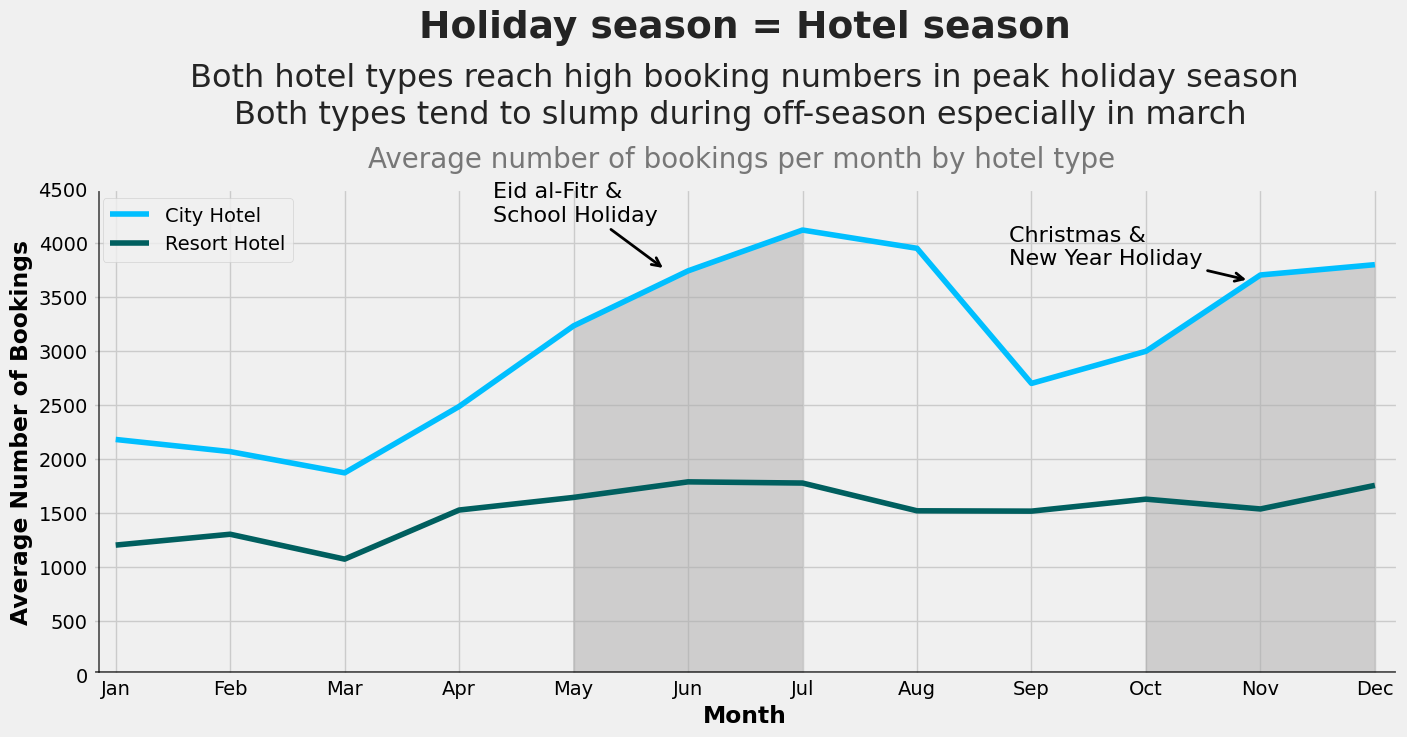

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the plot
plt.figure(figsize = (15, 6))
plt.style.use('fivethirtyeight')
fig = sns.lineplot(x='month', y = 'avg_bookings', hue = 'hotel_type', palette=['DeepSkyBlue', '#005f5f'], data = dfg)

plt.axvline(x = -0.15, color = 'black', linewidth = 1.2, alpha = .7)
plt.axhline(y = 20, color = 'black', linewidth = 1.3, alpha = .7)
plt.ylim(0, 4500)
plt.xlim(-0.2, 11.2)

# Creating shaded areas
plt.fill_between(dfg.index, y1=dfg.avg_bookings, y2=0, where=((dfg.index >= 4)&(dfg.index <= 6)) | ((dfg.index >= 9)&(dfg.index <= 11)), color='#adacac',
                 alpha=0.5, interpolate=False)

# Adding title and text
fig.text(x = 2.65, y = 5900, s = "Holiday season = Hotel season",
               fontsize = 27, weight = 'bold', alpha = .85)
fig.text(x = 0.65, y = 5450,
               s = 'Both hotel types reach high booking numbers in peak holiday season',
              fontsize = 23, alpha = .85)
fig.text(x = 1.03, y = 5100,
               s = 'Both types tend to slump during off-season especially in march',
              fontsize = 23, alpha = .85)
fig.text(x = 2.2, y = 4700,
               s = 'Average number of bookings per month by hotel type',
              fontsize = 20, alpha = .5)
# Adding annotations
ax = plt.gca()
ax.annotate(xy=(4.8,3750), xytext=(3.3, 4200), text='Eid al-Fitr &\nSchool Holiday', fontsize=16,
                arrowprops=dict(ec='black',
                                arrowstyle= '->', mutation_scale = 15, linewidth = 2.0))
ax.annotate(xy=(9.9,3650), xytext=(7.8, 3800), text='Christmas &\nNew Year Holiday', fontsize=16,
                arrowprops=dict(ec='black',
                                arrowstyle= '->', mutation_scale = 15, linewidth = 2.0))

# Setting axis labels
plt.xlabel('Month', fontweight='bold')
plt.ylabel('Average Number of Bookings', weight='bold')

# Setting legend
plt.legend(loc='upper left')

plt.show()

## **Analysis and interpretation**
- **Seasonal Fluctuations:** Both City and Resort Hotels experience fluctuations in bookings throughout the year, which is common in the hospitality industry. It appears that the mid-year months, particularly June and July, have the highest average bookings for both hotel types. Conversely, the early-year months, including January through March, see relatively lower average bookings.
- **Eid al-Fitr Impact:** It is essential to consider that Eid al-Fitr, a significant religious holiday in Indonesia, fell in June in the years 2017-2019. The surge in June-July bookings for both hotel types could be attributed to travelers returning to their hometowns to celebrate Eid al-Fitr with their families.
- **Year-End Peak:** There is a noticeable surge in average bookings for both City and Resort Hotels in November and December. This surge suggests increased demand during the holiday season, including **Christmas** and **New Year's**, as travelers seek accommodations for festive celebrations and vacations.
- **Academic Year:** Students in Indonesia usually commence their academic year in August or September. The decline in bookings observed in August and September for both hotel types may be associated with students and their families returning to school or work.
- **City Hotels vs. Resort Hotels:** Comparing the two types of hotels, City Hotels generally maintain higher average bookings year-round when compared to Resort Hotels. This could be attributed to the urban location and the lower rates offered by City Hotels, making them more accessible and affordable to both business and leisure travelers.
- **City Hotels vs. Resort Hotels (Part 2):** As stated in the above, more travelers book City Hotels in general. This could be the reason as to why the decline in Resort Hotels’ bookings was not as sharp as it was with City Hotels. Since Resort Hotels didn’t attract as many travelers, it didn’t peak as high, thus making the decline in bookings less sharp.

# **Impact analysis of Stay Duration on Hotel Bookings Cancellation Rates**

## Constructing new column for total stay duration

In [ ]:
df = df.copy()
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118900 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118900 non-null  object 
 1   is_canceled                     118900 non-null  int64  
 2   lead_time                       118900 non-null  int64  
 3   arrival_date_year               118900 non-null  int64  
 4   arrival_date_month              118900 non-null  object 
 5   arrival_date_week_number        118900 non-null  int64  
 6   arrival_date_day_of_month       118900 non-null  int64  
 7   stays_in_weekend_nights         118900 non-null  int64  
 8   stays_in_weekdays_nights        118900 non-null  int64  
 9   meal                            118900 non-null  object 
 10  city                            118900 non-null  object 
 11  market_segment                  118900 non-null  object 
 12  distribution_cha

## Looking at the stay duration distribution

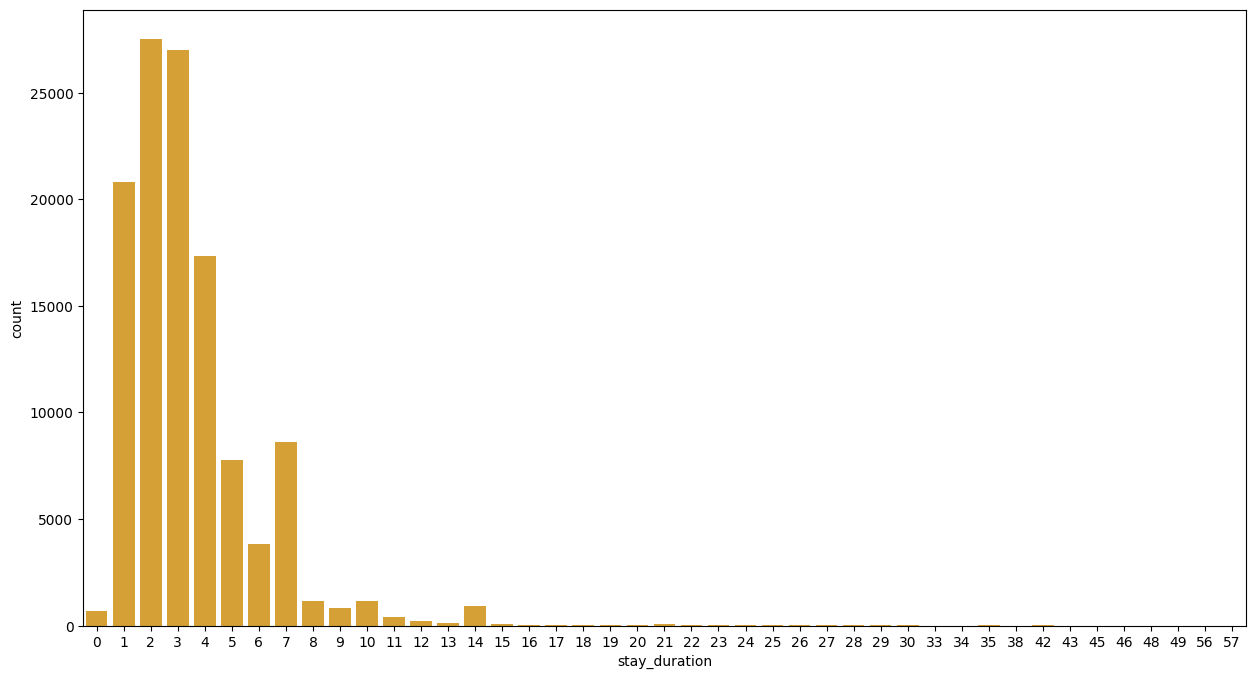

In [ ]:
plt.style.use('default')
plt.figure(figsize=(15,8))
sns.countplot(x='stay_duration', data = df, color ='#f0a91a')
plt.show()

**As can be seen from the above the values are right skewed**

## Grouping the values of stay duration to increase significance of high stay duration

Stay duration >14 will be grouped as 15 in the data frame

In [ ]:
df['stay_duration'] = np.where(df['stay_duration']>14, 15, df['stay_duration'])
df['stay_duration'].value_counts()

2     27530
3     27025
1     20796
4     17363
7      8634
5      7765
6      3850
8      1157
10     1135
14      913
9       838
0       701
15      435
11      395
12      223
13      140
Name: stay_duration, dtype: int64

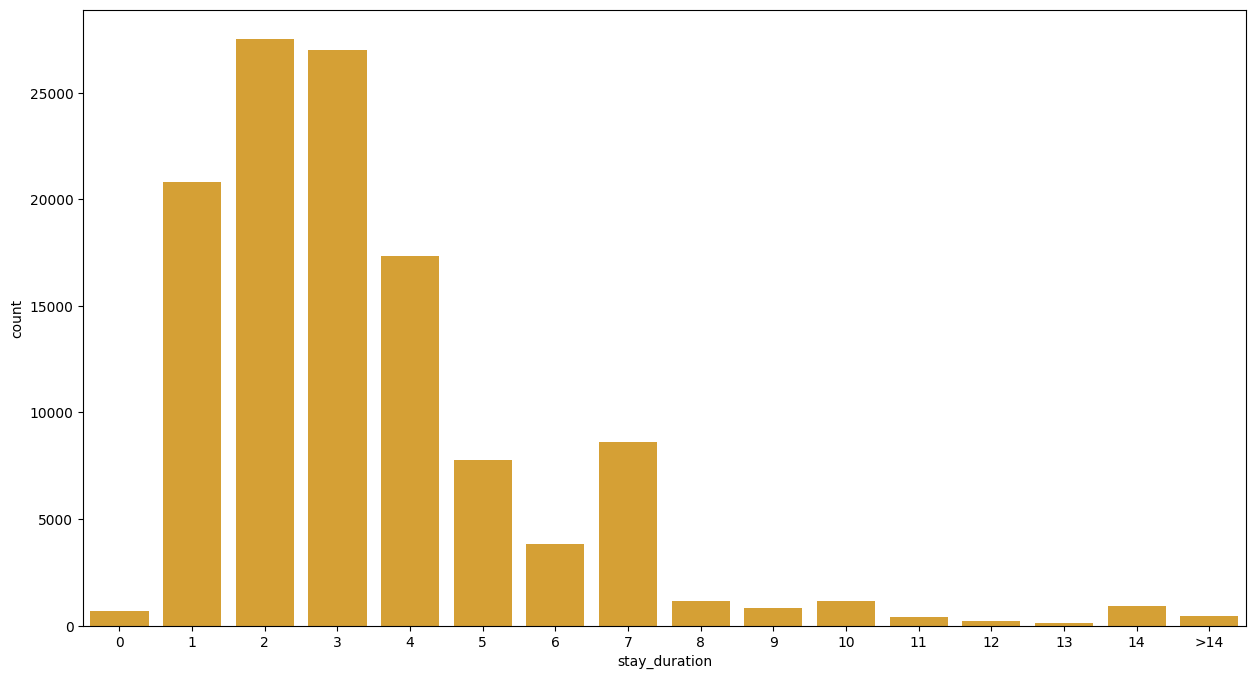

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x='stay_duration', data = df, color ='#f0a91a')
plt.xticks(range(0,16), labels=[str(x) for x in range(0,15)]+['>14'])
plt.show()

## Constructing aggregate table to see cancellation rates by stay duration for every hotel type

In [ ]:
dfg2 = df.groupby(['hotel', 'stay_duration', 'is_canceled']).agg({'stay_duration':'count'}).rename(columns={'stay_duration':'no._bookings'})
dfg2 = dfg2.pivot_table(index = ['hotel', 'stay_duration'], columns='is_canceled', values='no._bookings').rename(columns={0:'not_canceled', 1:'canceled'}).reset_index()
dfg2 = dfg2.copy()
dfg2['cancellation_rate'] = round(dfg2['canceled']/(dfg2['canceled']+dfg2['not_canceled'])*100, 2)
dfg2.columns = ['hotel_type', 'stay_duration', 'not_canceled', 'canceled', 'cancellation_rate']
dfg2

,hotel_type,stay_duration,not_canceled,canceled,cancellation_rate
0,City Hotel,0,308,16,4.94
1,City Hotel,1,9169,4102,30.91
2,City Hotel,2,10992,10433,48.70
3,City Hotel,3,11894,9472,44.33
4,City Hotel,4,7703,4853,38.65
5,City Hotel,5,3221,1776,35.54
6,City Hotel,6,1116,943,45.80
7,City Hotel,7,1251,808,39.24
8,City Hotel,8,209,176,45.71
9,City Hotel,9,120,93,43.66


## Visualizing cancellation rates by stay duration for every hotel type

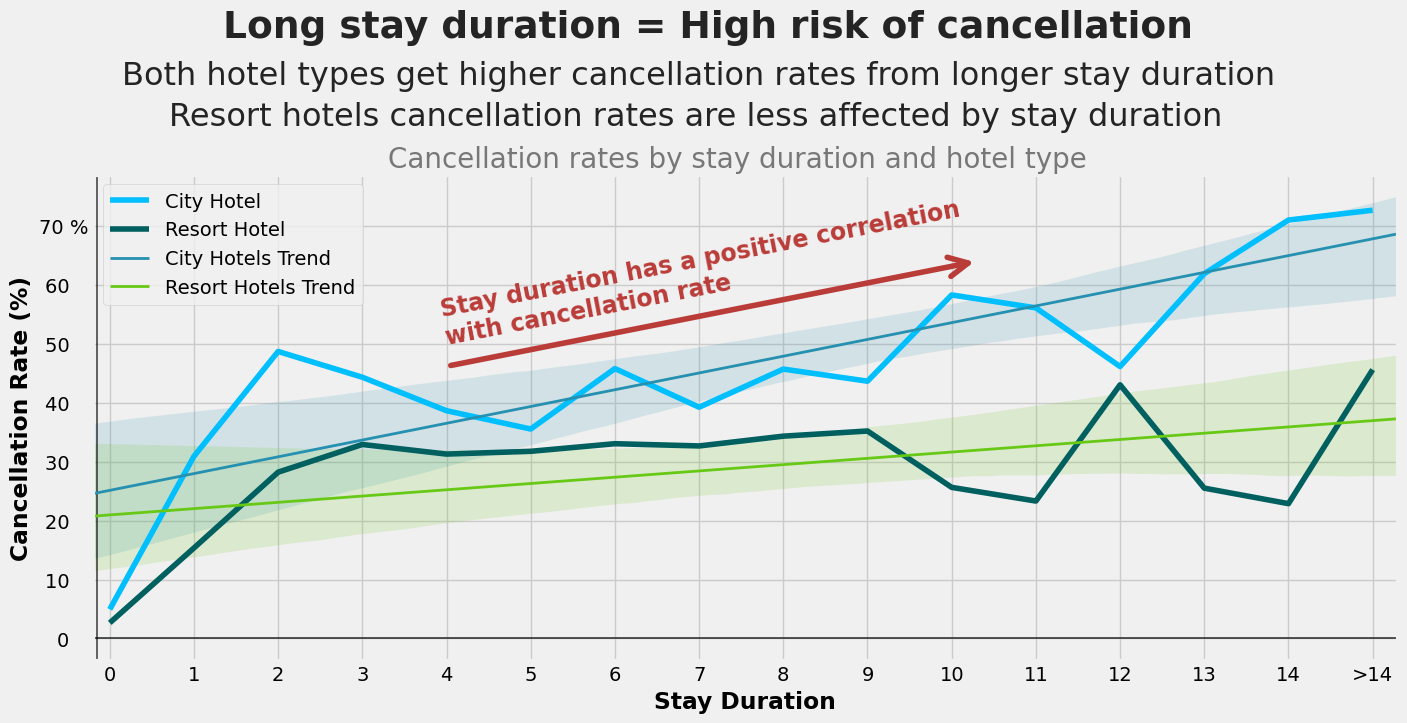

In [ ]:
# Creating the plot
plt.figure(figsize = (15, 6))
plt.style.use('fivethirtyeight')
fig = sns.lineplot(x='stay_duration', y = 'cancellation_rate', hue = 'hotel_type', palette=['DeepSkyBlue', '#005f5f'], data = dfg2)

plt.axvline(x = -0.15, color = 'black', linewidth = 1.2, alpha = .7)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#Setting tick labels
fig.set_yticks(range(0, 80, 10))
fig.set_yticklabels(labels = ['0   ', '10   ', '20   ', '30   ', '40   ', '50   ', '60   ', '70 %'])
fig.set_xticks(range(0,16))
fig.set_xticklabels(labels = [str(x) for x in range(0,15)]+['>14'])
plt.xlim(-0.2, 15.3)

# creating trend line for both hotel types
sns.regplot(x='stay_duration', y='cancellation_rate', data=dfg2[dfg2['hotel_type'] == 'City Hotel'],
            scatter=False, label='City Hotels Trend', truncate=False, line_kws={"linewidth": 2, 'color': '#2590b0'})#  #edbf18 #2baed6
sns.regplot(x='stay_duration', y='cancellation_rate', data=dfg2[dfg2['hotel_type'] == 'Resort Hotel'],
            scatter=False, label='Resort Hotels Trend', truncate=False, line_kws={"linewidth": 2, 'color': '#67c916'})

# Adding title and text
fig.text(x = 1.35, y = 102, s = "Long stay duration = High risk of cancellation",
               fontsize = 27, weight = 'bold', alpha = .85)
fig.text(x = 0.15, y = 94,
               s = 'Both hotel types get higher cancellation rates from longer stay duration',
              fontsize = 23, alpha = .85)
fig.text(x = 0.7, y = 87,
               s = 'Resort hotels cancellation rates are less affected by stay duration ',
              fontsize = 23, alpha = .85)
fig.text(x = 3.3, y = 80,
               s = 'Cancellation rates by stay duration and hotel type',
              fontsize = 20, alpha = .5)

# Adding annotations
ax = plt.gca()
ax.annotate(xy=(10.3,64), xytext=(3.9, 45), text=' ', fontsize=16,
                arrowprops=dict(ec='#ba3c38',
                                arrowstyle= '->', mutation_scale = 35, linewidth = 4.0))
fig.text(x = 3.9, y = 50, s = 'Stay duration has a positive correlation\nwith cancellation rate',
         fontsize = 17, rotation = 11, color='#ba3c38', weight='bold')

# Setting axis labels
plt.xlabel('Stay Duration', fontweight='bold')
plt.ylabel('Cancellation Rate (%)', weight='bold')

# Setting legend
plt.legend(loc='upper left')

plt.show()


## **Analysis and insights**
- **General Trends:** There is a consistent trend across both hotel types (City Hotel and Resort Hotel) where cancellation rates tend to increase as the duration of stay becomes longer. Shorter stays generally had lower cancellation rates, while longer stays had higher cancellation rates.
- **Short Stay Durations (0 to 5 nights):**
  - City Hotel: Cancellation rates increase from 4.94% to 35.54% as stay duration increases from 0 to 5 nights.
  - Resort Hotel: Cancellation rates increase from 2.65% to 31.76% as stay duration increases from 0 to 5 nights.
  - Short stays have relatively low cancellation rates for both hotel types, but Resort Hotels performs slightly better.
- **Medium Stay Durations (6 to 10 nights):**
  - City Hotel: Cancellation rates increase from 45.80% to 58.29% as stay duration increases from 6 to 10 nights.
  - Resort Hotel: Cancellation rates decrease from 33.05% to 25.64% as stay duration increases from 6 to 10 nights.
  - For medium-length stays, City Hotels had higher cancellation rates compared to Resort Hotels.
- **Long Stay Durations (>10 nights):**
  - City Hotel: Cancellation rates remain relatively stable and high, ranging from 46.15% to 72.67% for stay durations exceeding 10 nights.
  - Resort Hotel: Cancellation rates drop significantly from 43.04% (12 nights) to 22.88% (14 nights) but increase to 45.62% for stays longer than 14 nights.
  - Long stays are associated with high cancellation rates for both hotel types, with City Hotels consistently having higher rates.
-**City Hotels vs. Resort Hotels:** City Hotels had higher cancellation rates throughout the whole stay duration when compared to Resort Hotels. Resort Hotels’ cancellation rates also tend to be less affected by stay duration, exhibiting a shallower slope in cancellation rate increase throughout the whole stay duration.
<br><br>

**Overall Insights:**
- Short stays are generally associated with lower cancellation rates in both hotel types, suggesting that guests were less likely to cancel shorter bookings.
- Medium stays exhibit varying patterns, with both hotel types experiencing high and fluctuating cancellation rates.
- Long stays consistently had high cancellation rates in both hotel types, indicating a higher risk of cancellations for extended bookings.
- The trend is clear, bookings with higher stay duration carry a higher risk of cancellation.


# **Impact Analysis of Lead Time on Hotel Bookings Cancellation Rates**

## Constructing new column for the categorization of lead time

**Categories to be made:**
- Very Short: 0-7 days
- Short: 8-30 days
- Medium: 31-90 days
- Long: 91-180 days
- Very Long: 181+ days

In [ ]:
# Categorization function
def categorization(x):
  if x['lead_time'] <= 7:
    category = 'Very Short'
  elif x['lead_time'] > 7 and x['lead_time'] <= 30:
    category = 'Short'
  elif x['lead_time'] > 30 and x['lead_time'] <= 90:
    category = 'Medium'
  elif x['lead_time'] > 90 and x['lead_time'] <= 180:
    category = 'Long'
  else:
    category = 'Very Long'

  return category

In [ ]:
df = df.copy()
df['lead_time_category'] = df.apply(lambda x: categorization(x), axis = 1)
df[['lead_time', 'lead_time_category']]

,lead_time,lead_time_category
0,342,Very Long
1,737,Very Long
2,7,Very Short
3,13,Short
4,14,Short
...,...,...
119385,23,Short
119386,102,Long
119387,34,Medium
119388,109,Long


## Constructing aggregate table to see cancellation rates by lead time for every hotel type

In [ ]:
dfg3 = df.groupby(['hotel', 'lead_time_category', 'is_canceled']).agg({'is_canceled': 'count'}).rename(columns={'is_canceled':'no._bookings'})
dfg3 = dfg3.pivot_table(index = ['hotel', 'lead_time_category'], columns='is_canceled', values='no._bookings').rename(columns={0:'not_canceled', 1:'canceled'}).reset_index()
dfg3 = dfg3.copy()
dfg3['cancellation_rate'] = round(dfg3['canceled']/(dfg3['canceled']+dfg3['not_canceled'])*100, 2)
dfg3.columns = ['hotel_type', 'lead_time_category', 'not_canceled', 'canceled', 'cancellation_rate']
dfg3

,hotel_type,lead_time_category,not_canceled,canceled,cancellation_rate
0,City Hotel,Long,9477,8746,47.99
1,City Hotel,Medium,12497,8300,39.91
2,City Hotel,Short,8674,3880,30.91
3,City Hotel,Very Long,6091,10843,64.03
4,City Hotel,Very Short,9487,1309,12.12
5,Resort Hotel,Long,5116,3074,37.53
6,Resort Hotel,Medium,5887,2832,32.48
7,Resort Hotel,Short,4941,1395,22.02
8,Resort Hotel,Very Long,4515,3207,41.53
9,Resort Hotel,Very Short,8060,569,6.59


## Sorting the data based on lead time category

In [ ]:
categories = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
dfg3 = dfg3.copy()
dfg3['lead_time_category'] = pd.Categorical(dfg3['lead_time_category'], categories = categories, ordered=True)
dfg3 = dfg3.sort_values(['hotel_type', 'lead_time_category']).reset_index(drop=True)

dfg3

,hotel_type,lead_time_category,not_canceled,canceled,cancellation_rate
0,City Hotel,Very Short,9487,1309,12.12
1,City Hotel,Short,8674,3880,30.91
2,City Hotel,Medium,12497,8300,39.91
3,City Hotel,Long,9477,8746,47.99
4,City Hotel,Very Long,6091,10843,64.03
5,Resort Hotel,Very Short,8060,569,6.59
6,Resort Hotel,Short,4941,1395,22.02
7,Resort Hotel,Medium,5887,2832,32.48
8,Resort Hotel,Long,5116,3074,37.53
9,Resort Hotel,Very Long,4515,3207,41.53


## Visualizing cancellation rates by lead time for every hotel type

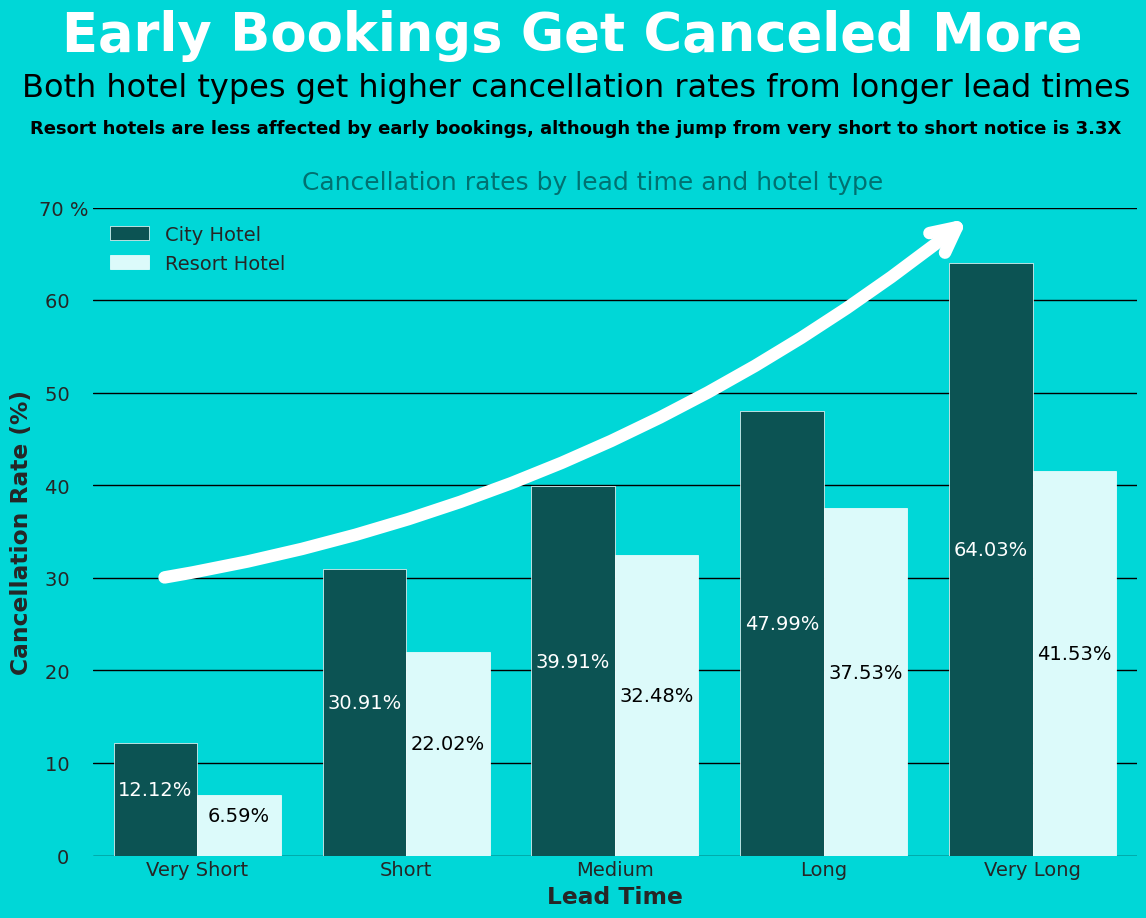

In [ ]:
import matplotlib.patches as patches

# Creating plot
plt.style.use('seaborn-v0_8-dark')
sns.set_style("whitegrid", {'grid.color': 'black'})
plt.figure(facecolor = '#00d7d7', figsize=(12,8))
plt.axes().set_facecolor('#00d7d7')

bar = sns.barplot(x = 'lead_time_category', y='cancellation_rate', hue = 'hotel_type', data=dfg3, palette = ['#005f5f', '#d7ffff'])

# Setting tick labels
bar.set_yticks(range(0, 80, 10))
bar.set_yticklabels(labels = ['0   ', '10   ', '20   ', '30   ', '40   ', '50   ', '60   ', '70 %'])

# Adding title and texts
bar.text(x = -0.65, y = 87,
           s = 'Early Bookings Get Canceled More',
          fontsize = 38, alpha =1, weight =1000, color='white')
bar.text(x = -0.84, y = 82,
           s = 'Both hotel types get higher cancellation rates from longer lead times',
          fontsize = 23, alpha =1, color='black')
bar.text(x = -0.8, y = 78,
           s = 'Resort hotels are less affected by early bookings, although the jump from very short to short notice is 3.3X',
          fontsize = 13, alpha =1, weight=1000, color='black')
bar.text(x = 0.5, y = 72,
           s = 'Cancellation rates by lead time and hotel type',
          fontsize = 18, alpha =0.85, color='#005f5f')

# Adding annotations and arrow
for i, j in zip(bar.patches, range(len(bar.patches))):
  height = i.get_height()
  width = i.get_width()
  x = i.get_x()
  y = i.get_y()
  if j > 4 != 0:
    bar.annotate(f'{height}%', (x + width/2, y + (height/2)), ha='center', va='bottom', color = 'black')
  else:
    bar.annotate(f'{height}%', (x + width/2, y + (height/2)), ha='center', va='bottom', color = 'white')

arrow = patches.FancyArrowPatch(
    (-0.17, 30),
    (3.7, 69),
    connectionstyle="arc3,rad=0.13",
    arrowstyle="->",
    mutation_scale=45,
    color = 'white',
    linewidth = 9
)
bar.add_patch(arrow)

# Setting axis labels
bar.set_xlabel('Lead Time', fontweight='bold')
bar.set_ylabel('Cancellation Rate (%)', weight='bold')

# Setting legend
plt.legend(loc='upper left')

plt.show()

## Analysis and Interpretation:
- **General Trend:** <br>The chart demonstrates a consistent trend where cancellation rates tend to increase as lead time increases, for both City Hotels and Resort Hotels. In other words, the longer the lead time before the booking, the higher the likelihood of a cancellation.
- **City Hotels vs. Resort Hotels:** <br>City Hotels generally exhibit higher cancellation rates compared to Resort Hotels across all lead time categories. This suggests that the type of hotel can significantly influence cancellation behavior, with City Hotels experiencing a greater number of cancellations.
- **City Hotels vs. Resort Hotels (part 2):** <br>Resort Hotels cancellation rates are more stagnant at higher lead times compared to City Hotels, however Resort Hotels cancellation rates jumped by more than 3.3x between very short and short notice, from having half the rate of City Hotels to having more than 2/3. This did not continue however, as towards the higher lead times City Hotels’ cancellation rates skyrocketed leaving Resort Hotels behind.
- **Very Short Lead Time:** <br>Both City Hotels and Resort Hotels experience their lowest cancellation rates in the "Very Short" lead time category. City Hotels have a cancellation rate of 12.12%, while Resort Hotels have a rate of 6.59% in this category. This implies that bookings made on very short notice are less likely to be canceled, possibly because guests have firm plans or limited flexibility.
- **Effect of Longer Lead Times:** <br>As lead time increases from "Short" to "Very Long," there is a consistent upward trend in cancellation rates for both hotel types. City Hotels, in particular, show a substantial increase in cancellation rates from 30.91% at "Short" lead time to 64.03% at "Very Long" lead time, indicating that guests booking well in advance are more likely to cancel.